In [1]:
#Load Data
#import csv
#dfile = open('train.csv', 'rb')
#reader = csv.reader(dfile, delimiter=',')
#data = []
import numpy as np
def loadData(fname):
    import csv
    dfile = open('train.csv', 'rb')
    reader = csv.reader(dfile, delimiter=',')
    data = []
    
    for row in reader:
        data.append(row)
    ndata = np.array(data)
    
    # Buld xSet and ySet
    ys = ndata[1:,1]
    ys = ys.reshape(len(ys),1)
    xs = np.transpose([ndata[1:,2], ndata[1:,4], ndata[1:,5]])
    
    return (xs,ys)
    
(xs, ys) = loadData('train.csv')

#xs = encode1hotColumn(1, xs, ['male', 'female'])
#(xs, ys) = cleanDataFromColumn(1,xs,ys)
#xs = xs.astype('float32')
#ys = ys.astype('float32')
#xs = normalizeCol(1, xs)
#xs = normalizeCol(0, xs)

#(trainXs,trainYs,validXs,validYs) = splitData(xs,ys,550)


In [2]:

# Change Gender String tags to 1-hot encoding
def encode1hotColumn(col, xs, possibles):
    encarr = np.zeros((len(xs),len(possibles)))
    for i in range(len(xs)):
        pos = possibles.index(xs[i,1])
        if pos != -1:
            encarr[i,pos] = 1
        else:
            print "SUPER ERROR! Not Able to Find '"+xs[i,1]+"'"
    xs = np.delete(xs,1,1)
    xs = np.append(xs, encarr, axis=1)
    return xs
#encarr = np.zeros((len(xs),2))
#for i in range(len(xs)):
#    if xs[i,1] == 'male':
#        encarr[i,0] = 1
#        encarr[i,1] = 0
#    else:
#        encarr[i,0] = 0
#        encarr[i,1] = 1

#xs = np.delete(xs,1,1)
#xs = np.append(xs, encarr, axis=1)

xs = encode1hotColumn(1, xs, ['male', 'female'])

# Remove Invalid X's with null age
def cleanDataFromColumn(col, xs,ys):
    missing = []
    (h,w) = xs.shape
    for i in xrange(h):
        if xs[i,col] == '':
            missing.append(i)
    xs = np.delete(xs, missing, 0)
    ys = np.delete(ys, missing, 0)
    return (xs, ys)

(xs, ys) = cleanDataFromColumn(1,xs,ys)
xs = xs.astype('float32')
ys = ys.astype('float32')
# Normalize Values to 0-1
# Normalize Edad

def normalizeCol(col, xs):
    maxEdad = np.amax(xs[:,col])
    minEdad = np.amin(xs[:,col])

    print "Max Edad: " + str(maxEdad)
    print "Min Edad: " + str(minEdad)

    xs[:,col] = (xs[:,col] - minEdad) / (maxEdad - minEdad)
    return xs

xs = normalizeCol(1, xs)

# Normalize PClass
xs = normalizeCol(0, xs)
#maxClass= np.amax(xs[:,0])
#minClass= np.amin(xs[:,0])

#xs[:,0] = (xs[:,0] - minClass) / (maxClass - minClass)




#xs = np.delete(xs,[0,1],1)
xs[:5]
samples = np.append(xs, ys, axis=1)
samples[:20]

Max Edad: 80.0
Min Edad: 0.42
Max Edad: 3.0
Min Edad: 1.0


array([[1.        , 0.27117366, 1.        , 0.        , 0.        ],
       [0.        , 0.4722292 , 0.        , 1.        , 1.        ],
       [1.        , 0.32143754, 0.        , 1.        , 1.        ],
       [0.        , 0.4345313 , 0.        , 1.        , 1.        ],
       [1.        , 0.4345313 , 1.        , 0.        , 0.        ],
       [0.        , 0.67328477, 1.        , 0.        , 0.        ],
       [1.        , 0.01985423, 1.        , 0.        , 0.        ],
       [1.        , 0.3340035 , 0.        , 1.        , 1.        ],
       [0.5       , 0.1706459 , 0.        , 1.        , 1.        ],
       [1.        , 0.04498618, 0.        , 1.        , 1.        ],
       [0.        , 0.72354865, 0.        , 1.        , 1.        ],
       [1.        , 0.24604172, 1.        , 0.        , 0.        ],
       [1.        , 0.48479518, 1.        , 0.        , 0.        ],
       [1.        , 0.1706459 , 0.        , 1.        , 0.        ],
       [0.5       , 0.68585074, 0.

In [3]:
def splitData(xs,ys,n):
    trainXs = xs[:n]
    trainYs = ys[:n]
    #trainYs = trainYs.reshape(len(trainYs),1)
    validXs = xs[n:]
    validYs = ys[n:]
    return (trainXs, trainYs, validXs, validYs)
#validYs = validYs.reshape(len(validYs),1)

(trainXs,trainYs,validXs,validYs) = splitData(xs,ys,550)
trainXs.shape

(550, 4)

In [4]:
import neuralnet as nn
nnet = nn.NeuralNet(4)
nnet.addLayer(4)
nnet.addLayer(2)
nnet.addLayer(1)

In [5]:
# Train Neural Net Model
(terr, verr) = nnet.train('m',trainXs.tolist(),trainYs.tolist(),validXs.tolist(),validYs.tolist(),1500,0.2)

Epoch #1 - Train Error: 0.470887883676 - Valid Error: 100
Epoch #1 - Train Accur: 0.409090909091 - Valid Accur: 0.396341463415
Epoch #2 - Train Error: 0.443477239214 - Valid Error: 100
Epoch #2 - Train Accur: 0.409090909091 - Valid Accur: 0.396341463415
Epoch #3 - Train Error: 0.408826735335 - Valid Error: 100
Epoch #3 - Train Accur: 0.409090909091 - Valid Accur: 0.396341463415
Epoch #4 - Train Error: 0.368584922689 - Valid Error: 100
Epoch #4 - Train Accur: 0.409090909091 - Valid Accur: 0.396341463415
Epoch #5 - Train Error: 0.328195844829 - Valid Error: 100
Epoch #5 - Train Accur: 0.409090909091 - Valid Accur: 0.396341463415
Epoch #6 - Train Error: 0.294667889897 - Valid Error: 100
Epoch #6 - Train Accur: 0.409090909091 - Valid Accur: 0.396341463415
Epoch #7 - Train Error: 0.27156155296 - Valid Error: 100
Epoch #7 - Train Accur: 0.409090909091 - Valid Accur: 0.396341463415
Epoch #8 - Train Error: 0.257682267474 - Valid Error: 100
Epoch #8 - Train Accur: 0.409090909091 - Valid Accur: 

Epoch #67 - Train Error: 0.239957796366 - Valid Error: 100
Epoch #67 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #68 - Train Error: 0.23993686106 - Valid Error: 100
Epoch #68 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #69 - Train Error: 0.239915700128 - Valid Error: 100
Epoch #69 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #70 - Train Error: 0.239894310015 - Valid Error: 100
Epoch #70 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #71 - Train Error: 0.239872687105 - Valid Error: 100
Epoch #71 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #72 - Train Error: 0.239850827716 - Valid Error: 100
Epoch #72 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #73 - Train Error: 0.239828728103 - Valid Error: 100
Epoch #73 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #74 - Train Error: 0.239806384451 - Valid Error: 100
Epoch #74 - Train Accur: 0.590909090909

Epoch #133 - Train Error: 0.237869451956 - Valid Error: 100
Epoch #133 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #134 - Train Error: 0.237821873139 - Valid Error: 100
Epoch #134 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #135 - Train Error: 0.237773613148 - Valid Error: 100
Epoch #135 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #136 - Train Error: 0.237724659686 - Valid Error: 100
Epoch #136 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #137 - Train Error: 0.237675000216 - Valid Error: 100
Epoch #137 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #138 - Train Error: 0.237624621954 - Valid Error: 100
Epoch #138 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #139 - Train Error: 0.237573511866 - Valid Error: 100
Epoch #139 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #140 - Train Error: 0.237521656663 - Valid Error: 100
Epoch #140 - Train Accu

Epoch #196 - Train Error: 0.232875851476 - Valid Error: 100
Epoch #196 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #197 - Train Error: 0.232748938531 - Valid Error: 100
Epoch #197 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #198 - Train Error: 0.232619917967 - Valid Error: 100
Epoch #198 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #199 - Train Error: 0.232488754577 - Valid Error: 100
Epoch #199 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #200 - Train Error: 0.232355412799 - Valid Error: 100
Epoch #200 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #201 - Train Error: 0.232219856735 - Valid Error: 100
Epoch #201 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #202 - Train Error: 0.232082050161 - Valid Error: 100
Epoch #202 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #203 - Train Error: 0.231941956541 - Valid Error: 100
Epoch #203 - Train Accu

Epoch #259 - Train Error: 0.219323368311 - Valid Error: 100
Epoch #259 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #260 - Train Error: 0.218996880316 - Valid Error: 100
Epoch #260 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #261 - Train Error: 0.218666623092 - Valid Error: 100
Epoch #261 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #262 - Train Error: 0.218332614868 - Valid Error: 100
Epoch #262 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #263 - Train Error: 0.217994876758 - Valid Error: 100
Epoch #263 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #264 - Train Error: 0.21765343282 - Valid Error: 100
Epoch #264 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #265 - Train Error: 0.217308310122 - Valid Error: 100
Epoch #265 - Train Accur: 0.590909090909 - Valid Accur: 0.603658536585
Epoch #266 - Train Error: 0.216959538797 - Valid Error: 100
Epoch #266 - Train Accur

Epoch #323 - Train Error: 0.193541570626 - Valid Error: 100
Epoch #323 - Train Accur: 0.78 - Valid Accur: 0.798780487805
Epoch #324 - Train Error: 0.193131959186 - Valid Error: 100
Epoch #324 - Train Accur: 0.776363636364 - Valid Accur: 0.798780487805
Epoch #325 - Train Error: 0.192724774046 - Valid Error: 100
Epoch #325 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #326 - Train Error: 0.192320115784 - Valid Error: 100
Epoch #326 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #327 - Train Error: 0.191918081631 - Valid Error: 100
Epoch #327 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #328 - Train Error: 0.191518765376 - Valid Error: 100
Epoch #328 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #329 - Train Error: 0.191122257264 - Valid Error: 100
Epoch #329 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #330 - Train Error: 0.190728643916 - Valid Error: 100
Epoch #330 - Train Accur: 0.77272

Epoch #388 - Train Error: 0.173928144319 - Valid Error: 100
Epoch #388 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #389 - Train Error: 0.173734936453 - Valid Error: 100
Epoch #389 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #390 - Train Error: 0.173544181134 - Valid Error: 100
Epoch #390 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #391 - Train Error: 0.173355825374 - Valid Error: 100
Epoch #391 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #392 - Train Error: 0.173169816234 - Valid Error: 100
Epoch #392 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #393 - Train Error: 0.172986100874 - Valid Error: 100
Epoch #393 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #394 - Train Error: 0.172804626591 - Valid Error: 100
Epoch #394 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #395 - Train Error: 0.172625340865 - Valid Error: 100
Epoch #395 - Train Accu

Epoch #453 - Train Error: 0.164444638565 - Valid Error: 100
Epoch #453 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #454 - Train Error: 0.164322219106 - Valid Error: 100
Epoch #454 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #455 - Train Error: 0.164200039339 - Valid Error: 100
Epoch #455 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #456 - Train Error: 0.164078094293 - Valid Error: 100
Epoch #456 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #457 - Train Error: 0.163956379896 - Valid Error: 100
Epoch #457 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #458 - Train Error: 0.163834892944 - Valid Error: 100
Epoch #458 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #459 - Train Error: 0.163713631087 - Valid Error: 100
Epoch #459 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #460 - Train Error: 0.163592592805 - Valid Error: 100
Epoch #460 - Train Accu

Epoch #516 - Train Error: 0.157335401591 - Valid Error: 100
Epoch #516 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #517 - Train Error: 0.157236975744 - Valid Error: 100
Epoch #517 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #518 - Train Error: 0.157139132806 - Valid Error: 100
Epoch #518 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #519 - Train Error: 0.157041876179 - Valid Error: 100
Epoch #519 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #520 - Train Error: 0.156945209091 - Valid Error: 100
Epoch #520 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #521 - Train Error: 0.156849134603 - Valid Error: 100
Epoch #521 - Train Accur: 0.774545454545 - Valid Accur: 0.80487804878
Epoch #522 - Train Error: 0.156753655612 - Valid Error: 100
Epoch #522 - Train Accur: 0.778181818182 - Valid Accur: 0.80487804878
Epoch #523 - Train Error: 0.156658774855 - Valid Error: 100
Epoch #523 - Train Accur:

Epoch #581 - Train Error: 0.152199943624 - Valid Error: 100
Epoch #581 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #582 - Train Error: 0.152140305484 - Valid Error: 100
Epoch #582 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #583 - Train Error: 0.152081193386 - Valid Error: 100
Epoch #583 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #584 - Train Error: 0.152022603223 - Valid Error: 100
Epoch #584 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #585 - Train Error: 0.15196453085 - Valid Error: 100
Epoch #585 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #586 - Train Error: 0.151906972083 - Valid Error: 100
Epoch #586 - Train Accur: 0.787272727273 - Valid Accur: 0.810975609756
Epoch #587 - Train Error: 0.151849922702 - Valid Error: 100
Epoch #587 - Train Accur: 0.787272727273 - Valid Accur: 0.80487804878
Epoch #588 - Train Error: 0.151793378456 - Valid Error: 100
Epoch #588 - Train Accur:

Epoch #646 - Train Error: 0.149232356382 - Valid Error: 100
Epoch #646 - Train Accur: 0.790909090909 - Valid Accur: 0.817073170732
Epoch #647 - Train Error: 0.149198262954 - Valid Error: 100
Epoch #647 - Train Accur: 0.790909090909 - Valid Accur: 0.817073170732
Epoch #648 - Train Error: 0.149164441728 - Valid Error: 100
Epoch #648 - Train Accur: 0.790909090909 - Valid Accur: 0.817073170732
Epoch #649 - Train Error: 0.149130889828 - Valid Error: 100
Epoch #649 - Train Accur: 0.790909090909 - Valid Accur: 0.817073170732
Epoch #650 - Train Error: 0.149097604414 - Valid Error: 100
Epoch #650 - Train Accur: 0.790909090909 - Valid Accur: 0.817073170732
Epoch #651 - Train Error: 0.14906458268 - Valid Error: 100
Epoch #651 - Train Accur: 0.790909090909 - Valid Accur: 0.817073170732
Epoch #652 - Train Error: 0.149031821858 - Valid Error: 100
Epoch #652 - Train Accur: 0.790909090909 - Valid Accur: 0.817073170732
Epoch #653 - Train Error: 0.148999319215 - Valid Error: 100
Epoch #653 - Train Accur

Epoch #711 - Train Error: 0.147478284106 - Valid Error: 100
Epoch #711 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #712 - Train Error: 0.147457231093 - Valid Error: 100
Epoch #712 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #713 - Train Error: 0.14743632246 - Valid Error: 100
Epoch #713 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #714 - Train Error: 0.147415556931 - Valid Error: 100
Epoch #714 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #715 - Train Error: 0.147394933245 - Valid Error: 100
Epoch #715 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #716 - Train Error: 0.147374450156 - Valid Error: 100
Epoch #716 - Train Accur: 0.787272727273 - Valid Accur: 0.829268292683
Epoch #717 - Train Error: 0.147354106431 - Valid Error: 100
Epoch #717 - Train Accur: 0.787272727273 - Valid Accur: 0.829268292683
Epoch #718 - Train Error: 0.147333900853 - Valid Error: 100
Epoch #718 - Train Accur

Epoch #777 - Train Error: 0.146349042248 - Valid Error: 100
Epoch #777 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #778 - Train Error: 0.146335326081 - Valid Error: 100
Epoch #778 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #779 - Train Error: 0.146321693908 - Valid Error: 100
Epoch #779 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #780 - Train Error: 0.146308145091 - Valid Error: 100
Epoch #780 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #781 - Train Error: 0.146294678999 - Valid Error: 100
Epoch #781 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #782 - Train Error: 0.146281295009 - Valid Error: 100
Epoch #782 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #783 - Train Error: 0.146267992499 - Valid Error: 100
Epoch #783 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #784 - Train Error: 0.146254770859 - Valid Error: 100
Epoch #784 - Train Accu

Epoch #840 - Train Error: 0.145626852721 - Valid Error: 100
Epoch #840 - Train Accur: 0.785454545455 - Valid Accur: 0.823170731707
Epoch #841 - Train Error: 0.145617389363 - Valid Error: 100
Epoch #841 - Train Accur: 0.785454545455 - Valid Accur: 0.823170731707
Epoch #842 - Train Error: 0.145607979413 - Valid Error: 100
Epoch #842 - Train Accur: 0.785454545455 - Valid Accur: 0.823170731707
Epoch #843 - Train Error: 0.145598622509 - Valid Error: 100
Epoch #843 - Train Accur: 0.785454545455 - Valid Accur: 0.823170731707
Epoch #844 - Train Error: 0.145589318293 - Valid Error: 100
Epoch #844 - Train Accur: 0.785454545455 - Valid Accur: 0.823170731707
Epoch #845 - Train Error: 0.145580066408 - Valid Error: 100
Epoch #845 - Train Accur: 0.785454545455 - Valid Accur: 0.823170731707
Epoch #846 - Train Error: 0.145570866502 - Valid Error: 100
Epoch #846 - Train Accur: 0.785454545455 - Valid Accur: 0.823170731707
Epoch #847 - Train Error: 0.145561718225 - Valid Error: 100
Epoch #847 - Train Accu

Epoch #905 - Train Error: 0.14510883425 - Valid Error: 100
Epoch #905 - Train Accur: 0.783636363636 - Valid Accur: 0.823170731707
Epoch #906 - Train Error: 0.145102203368 - Valid Error: 100
Epoch #906 - Train Accur: 0.783636363636 - Valid Accur: 0.823170731707
Epoch #907 - Train Error: 0.145095607513 - Valid Error: 100
Epoch #907 - Train Accur: 0.783636363636 - Valid Accur: 0.823170731707
Epoch #908 - Train Error: 0.145089046468 - Valid Error: 100
Epoch #908 - Train Accur: 0.783636363636 - Valid Accur: 0.823170731707
Epoch #909 - Train Error: 0.145082520018 - Valid Error: 100
Epoch #909 - Train Accur: 0.783636363636 - Valid Accur: 0.823170731707
Epoch #910 - Train Error: 0.14507602795 - Valid Error: 100
Epoch #910 - Train Accur: 0.783636363636 - Valid Accur: 0.823170731707
Epoch #911 - Train Error: 0.145069570051 - Valid Error: 100
Epoch #911 - Train Accur: 0.783636363636 - Valid Accur: 0.823170731707
Epoch #912 - Train Error: 0.145063146111 - Valid Error: 100
Epoch #912 - Train Accur:

Epoch #971 - Train Error: 0.144737443855 - Valid Error: 100
Epoch #971 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #972 - Train Error: 0.144732723706 - Valid Error: 100
Epoch #972 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #973 - Train Error: 0.144728027142 - Valid Error: 100
Epoch #973 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #974 - Train Error: 0.144723354027 - Valid Error: 100
Epoch #974 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #975 - Train Error: 0.144718704224 - Valid Error: 100
Epoch #975 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #976 - Train Error: 0.144714077601 - Valid Error: 100
Epoch #976 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #977 - Train Error: 0.144709474024 - Valid Error: 100
Epoch #977 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #978 - Train Error: 0.144704893359 - Valid Error: 100
Epoch #978 - Train Accu

Epoch #1034 - Train Error: 0.144481221097 - Valid Error: 100
Epoch #1034 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1035 - Train Error: 0.144477752981 - Valid Error: 100
Epoch #1035 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1036 - Train Error: 0.144474301393 - Valid Error: 100
Epoch #1036 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1037 - Train Error: 0.144470866242 - Valid Error: 100
Epoch #1037 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1038 - Train Error: 0.144467447438 - Valid Error: 100
Epoch #1038 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1039 - Train Error: 0.144464044891 - Valid Error: 100
Epoch #1039 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1040 - Train Error: 0.144460658511 - Valid Error: 100
Epoch #1040 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1041 - Train Error: 0.144457288211 - Valid Error: 100
Epoch #1

Epoch #1099 - Train Error: 0.144286558166 - Valid Error: 100
Epoch #1099 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1100 - Train Error: 0.144283997728 - Valid Error: 100
Epoch #1100 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1101 - Train Error: 0.144281448934 - Valid Error: 100
Epoch #1101 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1102 - Train Error: 0.144278911724 - Valid Error: 100
Epoch #1102 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1103 - Train Error: 0.144276386036 - Valid Error: 100
Epoch #1103 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1104 - Train Error: 0.14427387181 - Valid Error: 100
Epoch #1104 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1105 - Train Error: 0.144271368985 - Valid Error: 100
Epoch #1105 - Train Accur: 0.785454545455 - Valid Accur: 0.835365853659
Epoch #1106 - Train Error: 0.144268877502 - Valid Error: 100
Epoch #11

Epoch #1162 - Train Error: 0.14414575665 - Valid Error: 100
Epoch #1162 - Train Accur: 0.783636363636 - Valid Accur: 0.835365853659
Epoch #1163 - Train Error: 0.14414382306 - Valid Error: 100
Epoch #1163 - Train Accur: 0.783636363636 - Valid Accur: 0.835365853659
Epoch #1164 - Train Error: 0.14414189787 - Valid Error: 100
Epoch #1164 - Train Accur: 0.783636363636 - Valid Accur: 0.835365853659
Epoch #1165 - Train Error: 0.144139981035 - Valid Error: 100
Epoch #1165 - Train Accur: 0.783636363636 - Valid Accur: 0.835365853659
Epoch #1166 - Train Error: 0.144138072514 - Valid Error: 100
Epoch #1166 - Train Accur: 0.783636363636 - Valid Accur: 0.835365853659
Epoch #1167 - Train Error: 0.144136172264 - Valid Error: 100
Epoch #1167 - Train Accur: 0.783636363636 - Valid Accur: 0.835365853659
Epoch #1168 - Train Error: 0.144134280243 - Valid Error: 100
Epoch #1168 - Train Accur: 0.783636363636 - Valid Accur: 0.835365853659
Epoch #1169 - Train Error: 0.14413239641 - Valid Error: 100
Epoch #1169 

Epoch #1226 - Train Error: 0.144037299266 - Valid Error: 100
Epoch #1226 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1227 - Train Error: 0.144035826112 - Valid Error: 100
Epoch #1227 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1228 - Train Error: 0.144034359047 - Valid Error: 100
Epoch #1228 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1229 - Train Error: 0.14403289804 - Valid Error: 100
Epoch #1229 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1230 - Train Error: 0.144031443062 - Valid Error: 100
Epoch #1230 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1231 - Train Error: 0.144029994083 - Valid Error: 100
Epoch #1231 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1232 - Train Error: 0.144028551074 - Valid Error: 100
Epoch #1232 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1233 - Train Error: 0.144027114004 - Valid Error: 100
Epoch #12

Epoch #1290 - Train Error: 0.143954134592 - Valid Error: 100
Epoch #1290 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1291 - Train Error: 0.143952996629 - Valid Error: 100
Epoch #1291 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1292 - Train Error: 0.143951863118 - Valid Error: 100
Epoch #1292 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1293 - Train Error: 0.143950734038 - Valid Error: 100
Epoch #1293 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1294 - Train Error: 0.143949609367 - Valid Error: 100
Epoch #1294 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1295 - Train Error: 0.143948489085 - Valid Error: 100
Epoch #1295 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1296 - Train Error: 0.143947373171 - Valid Error: 100
Epoch #1296 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1297 - Train Error: 0.143946261602 - Valid Error: 100
Epoch #1

Epoch #1353 - Train Error: 0.143890348622 - Valid Error: 100
Epoch #1353 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1354 - Train Error: 0.143889453327 - Valid Error: 100
Epoch #1354 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1355 - Train Error: 0.143888561328 - Valid Error: 100
Epoch #1355 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1356 - Train Error: 0.143887672608 - Valid Error: 100
Epoch #1356 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1357 - Train Error: 0.143886787151 - Valid Error: 100
Epoch #1357 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1358 - Train Error: 0.143885904944 - Valid Error: 100
Epoch #1358 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1359 - Train Error: 0.143885025969 - Valid Error: 100
Epoch #1359 - Train Accur: 0.785454545455 - Valid Accur: 0.829268292683
Epoch #1360 - Train Error: 0.143884150213 - Valid Error: 100
Epoch #1

Epoch #1417 - Train Error: 0.143839091238 - Valid Error: 100
Epoch #1417 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1418 - Train Error: 0.143838378479 - Valid Error: 100
Epoch #1418 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1419 - Train Error: 0.14383766816 - Valid Error: 100
Epoch #1419 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1420 - Train Error: 0.143836960272 - Valid Error: 100
Epoch #1420 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1421 - Train Error: 0.143836254802 - Valid Error: 100
Epoch #1421 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1422 - Train Error: 0.143835551739 - Valid Error: 100
Epoch #1422 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1423 - Train Error: 0.143834851072 - Valid Error: 100
Epoch #1423 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1424 - Train Error: 0.14383415279 - Valid Error: 100
Epoch #142

Epoch #1479 - Train Error: 0.143799117018 - Valid Error: 100
Epoch #1479 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1480 - Train Error: 0.143798536131 - Valid Error: 100
Epoch #1480 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1481 - Train Error: 0.143797957077 - Valid Error: 100
Epoch #1481 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1482 - Train Error: 0.143797379849 - Valid Error: 100
Epoch #1482 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1483 - Train Error: 0.143796804437 - Valid Error: 100
Epoch #1483 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1484 - Train Error: 0.143796230833 - Valid Error: 100
Epoch #1484 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1485 - Train Error: 0.143795659029 - Valid Error: 100
Epoch #1485 - Train Accur: 0.783636363636 - Valid Accur: 0.829268292683
Epoch #1486 - Train Error: 0.143795089017 - Valid Error: 100
Epoch #1

In [6]:
#Clase Baja, Edad 30años, Hombre -> Muerto
nnet.forward([1,0.3685,1,0])

[0.14395011821668158]

In [7]:
#Clase Alta, Edad 30años, Mujer -> Viva
nnet.forward([0,0.3685,0,1])

[0.9384021357652592]

In [8]:
nnet.neurons

[[[0.6127746356190917,
   0.3387270202430323,
   0.07319655973825459,
   0.5062654045471134,
   1.2803426708605639],
  [-1.6455690308823847,
   3.3205628849428503,
   1.7601918626007544,
   1.367762024265987,
   -1.579537861371676],
  [0.035336448900937636,
   0.1657454552544367,
   0.345263192991631,
   0.7910170112829389,
   -0.11686105072925758],
  [-0.8489901251252174,
   -0.6716244054630052,
   -0.8628570996448501,
   -0.050398593722702986,
   -0.6586584314222123]],
 [[-1.7555965932235322,
   -1.1803303623390566,
   5.0144984262866155,
   0.14434664770985417,
   -0.5955739709782312],
  [0.19147311350455662,
   -0.8407956768023312,
   1.2230796461347064,
   0.5601858550092319,
   0.8787115431352067]],
 [[3.2778576250529756, -5.405868089200327, -0.24719109078204662]]]

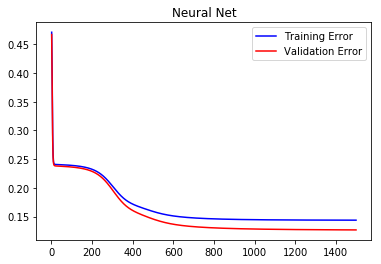

In [9]:
%matplotlib inline
nn.show_errorGraph('Neural Net', (terr, verr))

In [10]:
lognet = nn.NeuralNet(4)
lognet.addLayer(1)

# Train Logistic Net Model
(terr, verr) = lognet.train('m',trainXs.tolist(),trainYs.tolist(),validXs.tolist(),validYs.tolist(),1500,0.2)

Epoch #1 - Train Error: 0.313471083433 - Valid Error: 100
Epoch #1 - Train Accur: 0.409090909091 - Valid Accur: 0.396341463415
Epoch #2 - Train Error: 0.262461157558 - Valid Error: 100
Epoch #2 - Train Accur: 0.409090909091 - Valid Accur: 0.40243902439
Epoch #3 - Train Error: 0.224967367259 - Valid Error: 100
Epoch #3 - Train Accur: 0.603636363636 - Valid Accur: 0.75
Epoch #4 - Train Error: 0.201558934779 - Valid Error: 100
Epoch #4 - Train Accur: 0.76 - Valid Accur: 0.80487804878
Epoch #5 - Train Error: 0.187896795479 - Valid Error: 100
Epoch #5 - Train Accur: 0.770909090909 - Valid Accur: 0.798780487805
Epoch #6 - Train Error: 0.179910139465 - Valid Error: 100
Epoch #6 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #7 - Train Error: 0.175061835626 - Valid Error: 100
Epoch #7 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #8 - Train Error: 0.171954967813 - Valid Error: 100
Epoch #8 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch 

Epoch #74 - Train Error: 0.155076853637 - Valid Error: 100
Epoch #74 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #75 - Train Error: 0.155022092799 - Valid Error: 100
Epoch #75 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #76 - Train Error: 0.154968298759 - Valid Error: 100
Epoch #76 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #77 - Train Error: 0.154915443686 - Valid Error: 100
Epoch #77 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #78 - Train Error: 0.154863500947 - Valid Error: 100
Epoch #78 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #79 - Train Error: 0.154812445043 - Valid Error: 100
Epoch #79 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #80 - Train Error: 0.154762251529 - Valid Error: 100
Epoch #80 - Train Accur: 0.774545454545 - Valid Accur: 0.798780487805
Epoch #81 - Train Error: 0.154712896954 - Valid Error: 100
Epoch #81 - Train Accur: 0.77454545454

Epoch #145 - Train Error: 0.152647743612 - Valid Error: 100
Epoch #145 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #146 - Train Error: 0.152626207931 - Valid Error: 100
Epoch #146 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #147 - Train Error: 0.152604878647 - Valid Error: 100
Epoch #147 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #148 - Train Error: 0.152583752191 - Valid Error: 100
Epoch #148 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #149 - Train Error: 0.152562825077 - Valid Error: 100
Epoch #149 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #150 - Train Error: 0.152542093894 - Valid Error: 100
Epoch #150 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #151 - Train Error: 0.152521555308 - Valid Error: 100
Epoch #151 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #152 - Train Error: 0.152501206056 - Valid Error: 100
Epoch #152 - Train Accu

Epoch #213 - Train Error: 0.151523177234 - Valid Error: 100
Epoch #213 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #214 - Train Error: 0.151510328278 - Valid Error: 100
Epoch #214 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #215 - Train Error: 0.151497555563 - Valid Error: 100
Epoch #215 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #216 - Train Error: 0.151484858179 - Valid Error: 100
Epoch #216 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #217 - Train Error: 0.151472235231 - Valid Error: 100
Epoch #217 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #218 - Train Error: 0.15145968584 - Valid Error: 100
Epoch #218 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #219 - Train Error: 0.151447209142 - Valid Error: 100
Epoch #219 - Train Accur: 0.772727272727 - Valid Accur: 0.798780487805
Epoch #220 - Train Error: 0.151434804289 - Valid Error: 100
Epoch #220 - Train Accur

Epoch #281 - Train Error: 0.150787696635 - Valid Error: 100
Epoch #281 - Train Accur: 0.783636363636 - Valid Accur: 0.80487804878
Epoch #282 - Train Error: 0.150778549133 - Valid Error: 100
Epoch #282 - Train Accur: 0.783636363636 - Valid Accur: 0.80487804878
Epoch #283 - Train Error: 0.150769440307 - Valid Error: 100
Epoch #283 - Train Accur: 0.783636363636 - Valid Accur: 0.80487804878
Epoch #284 - Train Error: 0.150760369842 - Valid Error: 100
Epoch #284 - Train Accur: 0.783636363636 - Valid Accur: 0.80487804878
Epoch #285 - Train Error: 0.150751337429 - Valid Error: 100
Epoch #285 - Train Accur: 0.783636363636 - Valid Accur: 0.80487804878
Epoch #286 - Train Error: 0.150742342761 - Valid Error: 100
Epoch #286 - Train Accur: 0.783636363636 - Valid Accur: 0.80487804878
Epoch #287 - Train Error: 0.150733385538 - Valid Error: 100
Epoch #287 - Train Accur: 0.783636363636 - Valid Accur: 0.80487804878
Epoch #288 - Train Error: 0.150724465461 - Valid Error: 100
Epoch #288 - Train Accur: 0.78

Epoch #349 - Train Error: 0.150240855898 - Valid Error: 100
Epoch #349 - Train Accur: 0.790909090909 - Valid Accur: 0.810975609756
Epoch #350 - Train Error: 0.150233788255 - Valid Error: 100
Epoch #350 - Train Accur: 0.790909090909 - Valid Accur: 0.810975609756
Epoch #351 - Train Error: 0.150226744847 - Valid Error: 100
Epoch #351 - Train Accur: 0.792727272727 - Valid Accur: 0.810975609756
Epoch #352 - Train Error: 0.150219725536 - Valid Error: 100
Epoch #352 - Train Accur: 0.792727272727 - Valid Accur: 0.810975609756
Epoch #353 - Train Error: 0.150212730183 - Valid Error: 100
Epoch #353 - Train Accur: 0.792727272727 - Valid Accur: 0.810975609756
Epoch #354 - Train Error: 0.150205758652 - Valid Error: 100
Epoch #354 - Train Accur: 0.792727272727 - Valid Accur: 0.810975609756
Epoch #355 - Train Error: 0.150198810808 - Valid Error: 100
Epoch #355 - Train Accur: 0.792727272727 - Valid Accur: 0.810975609756
Epoch #356 - Train Error: 0.150191886517 - Valid Error: 100
Epoch #356 - Train Accu

Epoch #419 - Train Error: 0.14979812107 - Valid Error: 100
Epoch #419 - Train Accur: 0.792727272727 - Valid Accur: 0.817073170732
Epoch #420 - Train Error: 0.149792476186 - Valid Error: 100
Epoch #420 - Train Accur: 0.792727272727 - Valid Accur: 0.817073170732
Epoch #421 - Train Error: 0.14978684836 - Valid Error: 100
Epoch #421 - Train Accur: 0.792727272727 - Valid Accur: 0.817073170732
Epoch #422 - Train Error: 0.149781237518 - Valid Error: 100
Epoch #422 - Train Accur: 0.792727272727 - Valid Accur: 0.817073170732
Epoch #423 - Train Error: 0.149775643585 - Valid Error: 100
Epoch #423 - Train Accur: 0.792727272727 - Valid Accur: 0.817073170732
Epoch #424 - Train Error: 0.149770066488 - Valid Error: 100
Epoch #424 - Train Accur: 0.792727272727 - Valid Accur: 0.810975609756
Epoch #425 - Train Error: 0.149764506154 - Valid Error: 100
Epoch #425 - Train Accur: 0.790909090909 - Valid Accur: 0.810975609756
Epoch #426 - Train Error: 0.149758962511 - Valid Error: 100
Epoch #426 - Train Accur:

Epoch #489 - Train Error: 0.149440535556 - Valid Error: 100
Epoch #489 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #490 - Train Error: 0.149435930235 - Valid Error: 100
Epoch #490 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #491 - Train Error: 0.149431337818 - Valid Error: 100
Epoch #491 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #492 - Train Error: 0.149426758259 - Valid Error: 100
Epoch #492 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #493 - Train Error: 0.149422191511 - Valid Error: 100
Epoch #493 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #494 - Train Error: 0.149417637528 - Valid Error: 100
Epoch #494 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #495 - Train Error: 0.149413096263 - Valid Error: 100
Epoch #495 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #496 - Train Error: 0.149408567671 - Valid Error: 100
Epoch #496 - Train Accu

Epoch #557 - Train Error: 0.149154610113 - Valid Error: 100
Epoch #557 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #558 - Train Error: 0.149150786908 - Valid Error: 100
Epoch #558 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #559 - Train Error: 0.149146973918 - Valid Error: 100
Epoch #559 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #560 - Train Error: 0.149143171109 - Valid Error: 100
Epoch #560 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #561 - Train Error: 0.149139378449 - Valid Error: 100
Epoch #561 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #562 - Train Error: 0.149135595905 - Valid Error: 100
Epoch #562 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #563 - Train Error: 0.149131823443 - Valid Error: 100
Epoch #563 - Train Accur: 0.785454545455 - Valid Accur: 0.810975609756
Epoch #564 - Train Error: 0.149128061032 - Valid Error: 100
Epoch #564 - Train Accu

Epoch #630 - Train Error: 0.148900445005 - Valid Error: 100
Epoch #630 - Train Accur: 0.78 - Valid Accur: 0.810975609756
Epoch #631 - Train Error: 0.148897288566 - Valid Error: 100
Epoch #631 - Train Accur: 0.78 - Valid Accur: 0.810975609756
Epoch #632 - Train Error: 0.148894140257 - Valid Error: 100
Epoch #632 - Train Accur: 0.78 - Valid Accur: 0.810975609756
Epoch #633 - Train Error: 0.148891000054 - Valid Error: 100
Epoch #633 - Train Accur: 0.78 - Valid Accur: 0.810975609756
Epoch #634 - Train Error: 0.148887867932 - Valid Error: 100
Epoch #634 - Train Accur: 0.78 - Valid Accur: 0.810975609756
Epoch #635 - Train Error: 0.148884743868 - Valid Error: 100
Epoch #635 - Train Accur: 0.78 - Valid Accur: 0.810975609756
Epoch #636 - Train Error: 0.148881627836 - Valid Error: 100
Epoch #636 - Train Accur: 0.78 - Valid Accur: 0.810975609756
Epoch #637 - Train Error: 0.148878519813 - Valid Error: 100
Epoch #637 - Train Accur: 0.78 - Valid Accur: 0.810975609756
Epoch #638 - Train Error: 0.1488

Epoch #704 - Train Error: 0.148687341705 - Valid Error: 100
Epoch #704 - Train Accur: 0.785454545455 - Valid Accur: 0.817073170732
Epoch #705 - Train Error: 0.148684726329 - Valid Error: 100
Epoch #705 - Train Accur: 0.785454545455 - Valid Accur: 0.817073170732
Epoch #706 - Train Error: 0.148682117495 - Valid Error: 100
Epoch #706 - Train Accur: 0.785454545455 - Valid Accur: 0.817073170732
Epoch #707 - Train Error: 0.148679515185 - Valid Error: 100
Epoch #707 - Train Accur: 0.785454545455 - Valid Accur: 0.817073170732
Epoch #708 - Train Error: 0.148676919381 - Valid Error: 100
Epoch #708 - Train Accur: 0.785454545455 - Valid Accur: 0.817073170732
Epoch #709 - Train Error: 0.148674330063 - Valid Error: 100
Epoch #709 - Train Accur: 0.785454545455 - Valid Accur: 0.817073170732
Epoch #710 - Train Error: 0.148671747213 - Valid Error: 100
Epoch #710 - Train Accur: 0.785454545455 - Valid Accur: 0.817073170732
Epoch #711 - Train Error: 0.148669170812 - Valid Error: 100
Epoch #711 - Train Accu

Epoch #776 - Train Error: 0.148514703279 - Valid Error: 100
Epoch #776 - Train Accur: 0.789090909091 - Valid Accur: 0.817073170732
Epoch #777 - Train Error: 0.148512514673 - Valid Error: 100
Epoch #777 - Train Accur: 0.789090909091 - Valid Accur: 0.817073170732
Epoch #778 - Train Error: 0.14851033141 - Valid Error: 100
Epoch #778 - Train Accur: 0.789090909091 - Valid Accur: 0.817073170732
Epoch #779 - Train Error: 0.148508153475 - Valid Error: 100
Epoch #779 - Train Accur: 0.789090909091 - Valid Accur: 0.817073170732
Epoch #780 - Train Error: 0.148505980854 - Valid Error: 100
Epoch #780 - Train Accur: 0.789090909091 - Valid Accur: 0.817073170732
Epoch #781 - Train Error: 0.148503813532 - Valid Error: 100
Epoch #781 - Train Accur: 0.789090909091 - Valid Accur: 0.817073170732
Epoch #782 - Train Error: 0.148501651494 - Valid Error: 100
Epoch #782 - Train Accur: 0.789090909091 - Valid Accur: 0.817073170732
Epoch #783 - Train Error: 0.148499494726 - Valid Error: 100
Epoch #783 - Train Accur

Epoch #841 - Train Error: 0.148382943525 - Valid Error: 100
Epoch #841 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #842 - Train Error: 0.148381073474 - Valid Error: 100
Epoch #842 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #843 - Train Error: 0.148379207897 - Valid Error: 100
Epoch #843 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #844 - Train Error: 0.148377346783 - Valid Error: 100
Epoch #844 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #845 - Train Error: 0.14837549012 - Valid Error: 100
Epoch #845 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #846 - Train Error: 0.148373637895 - Valid Error: 100
Epoch #846 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #847 - Train Error: 0.148371790097 - Valid Error: 100
Epoch #847 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #848 - Train Error: 0.148369946714 - Valid Error: 100
Epoch #848 - Train Accur

Epoch #904 - Train Error: 0.148273412357 - Valid Error: 100
Epoch #904 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #905 - Train Error: 0.148271802088 - Valid Error: 100
Epoch #905 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #906 - Train Error: 0.148270195603 - Valid Error: 100
Epoch #906 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #907 - Train Error: 0.14826859289 - Valid Error: 100
Epoch #907 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #908 - Train Error: 0.148266993941 - Valid Error: 100
Epoch #908 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #909 - Train Error: 0.148265398746 - Valid Error: 100
Epoch #909 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #910 - Train Error: 0.148263807294 - Valid Error: 100
Epoch #910 - Train Accur: 0.789090909091 - Valid Accur: 0.829268292683
Epoch #911 - Train Error: 0.148262219576 - Valid Error: 100
Epoch #911 - Train Accur

Epoch #969 - Train Error: 0.148176198381 - Valid Error: 100
Epoch #969 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #970 - Train Error: 0.14817481454 - Valid Error: 100
Epoch #970 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #971 - Train Error: 0.148173433893 - Valid Error: 100
Epoch #971 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #972 - Train Error: 0.148172056431 - Valid Error: 100
Epoch #972 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #973 - Train Error: 0.148170682146 - Valid Error: 100
Epoch #973 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #974 - Train Error: 0.14816931103 - Valid Error: 100
Epoch #974 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #975 - Train Error: 0.148167943074 - Valid Error: 100
Epoch #975 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #976 - Train Error: 0.148166578271 - Valid Error: 100
Epoch #976 - Train Accur:

Epoch #1036 - Train Error: 0.148090164894 - Valid Error: 100
Epoch #1036 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1037 - Train Error: 0.148088977897 - Valid Error: 100
Epoch #1037 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1038 - Train Error: 0.14808779359 - Valid Error: 100
Epoch #1038 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1039 - Train Error: 0.148086611967 - Valid Error: 100
Epoch #1039 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1040 - Train Error: 0.148085433022 - Valid Error: 100
Epoch #1040 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1041 - Train Error: 0.148084256748 - Valid Error: 100
Epoch #1041 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1042 - Train Error: 0.148083083137 - Valid Error: 100
Epoch #1042 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1043 - Train Error: 0.148081912184 - Valid Error: 100
Epoch #10

Epoch #1105 - Train Error: 0.148014235067 - Valid Error: 100
Epoch #1105 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1106 - Train Error: 0.148013218762 - Valid Error: 100
Epoch #1106 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1107 - Train Error: 0.148012204721 - Valid Error: 100
Epoch #1107 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1108 - Train Error: 0.148011192939 - Valid Error: 100
Epoch #1108 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1109 - Train Error: 0.14801018341 - Valid Error: 100
Epoch #1109 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1110 - Train Error: 0.148009176128 - Valid Error: 100
Epoch #1110 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1111 - Train Error: 0.148008171087 - Valid Error: 100
Epoch #1111 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1112 - Train Error: 0.148007168283 - Valid Error: 100
Epoch #11

Epoch #1173 - Train Error: 0.14795001525 - Valid Error: 100
Epoch #1173 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1174 - Train Error: 0.147949140877 - Valid Error: 100
Epoch #1174 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1175 - Train Error: 0.14794826842 - Valid Error: 100
Epoch #1175 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1176 - Train Error: 0.147947397874 - Valid Error: 100
Epoch #1176 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1177 - Train Error: 0.147946529236 - Valid Error: 100
Epoch #1177 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1178 - Train Error: 0.147945662499 - Valid Error: 100
Epoch #1178 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1179 - Train Error: 0.147944797659 - Valid Error: 100
Epoch #1179 - Train Accur: 0.789090909091 - Valid Accur: 0.823170731707
Epoch #1180 - Train Error: 0.147943934713 - Valid Error: 100
Epoch #118

Epoch #1240 - Train Error: 0.147895454984 - Valid Error: 100
Epoch #1240 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1241 - Train Error: 0.147894699272 - Valid Error: 100
Epoch #1241 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1242 - Train Error: 0.147893945191 - Valid Error: 100
Epoch #1242 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1243 - Train Error: 0.147893192736 - Valid Error: 100
Epoch #1243 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1244 - Train Error: 0.147892441904 - Valid Error: 100
Epoch #1244 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1245 - Train Error: 0.14789169269 - Valid Error: 100
Epoch #1245 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1246 - Train Error: 0.147890945092 - Valid Error: 100
Epoch #1246 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1247 - Train Error: 0.147890199105 - Valid Error: 100
Epoch #12

Epoch #1308 - Train Error: 0.147847593901 - Valid Error: 100
Epoch #1308 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1309 - Train Error: 0.147846940694 - Valid Error: 100
Epoch #1309 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1310 - Train Error: 0.147846288875 - Valid Error: 100
Epoch #1310 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1311 - Train Error: 0.147845638441 - Valid Error: 100
Epoch #1311 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1312 - Train Error: 0.147844989388 - Valid Error: 100
Epoch #1312 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1313 - Train Error: 0.147844341713 - Valid Error: 100
Epoch #1313 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1314 - Train Error: 0.147843695414 - Valid Error: 100
Epoch #1314 - Train Accur: 0.787272727273 - Valid Accur: 0.823170731707
Epoch #1315 - Train Error: 0.147843050487 - Valid Error: 100
Epoch #1

Epoch #1372 - Train Error: 0.147808456794 - Valid Error: 100
Epoch #1372 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1373 - Train Error: 0.147807886209 - Valid Error: 100
Epoch #1373 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1374 - Train Error: 0.14780731682 - Valid Error: 100
Epoch #1374 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1375 - Train Error: 0.147806748624 - Valid Error: 100
Epoch #1375 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1376 - Train Error: 0.147806181619 - Valid Error: 100
Epoch #1376 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1377 - Train Error: 0.147805615802 - Valid Error: 100
Epoch #1377 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1378 - Train Error: 0.14780505117 - Valid Error: 100
Epoch #1378 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1379 - Train Error: 0.147804487721 - Valid Error: 100
Epoch #137

Epoch #1443 - Train Error: 0.147770766728 - Valid Error: 100
Epoch #1443 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1444 - Train Error: 0.147770274605 - Valid Error: 100
Epoch #1444 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1445 - Train Error: 0.147769783498 - Valid Error: 100
Epoch #1445 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1446 - Train Error: 0.147769293406 - Valid Error: 100
Epoch #1446 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1447 - Train Error: 0.147768804326 - Valid Error: 100
Epoch #1447 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1448 - Train Error: 0.147768316256 - Valid Error: 100
Epoch #1448 - Train Accur: 0.787272727273 - Valid Accur: 0.817073170732
Epoch #1449 - Train Error: 0.147767829194 - Valid Error: 100
Epoch #1449 - Train Accur: 0.789090909091 - Valid Accur: 0.817073170732
Epoch #1450 - Train Error: 0.147767343137 - Valid Error: 100
Epoch #1

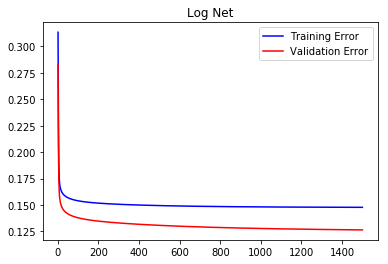

In [11]:
nn.show_errorGraph('Log Net', (terr, verr))